# **MERGE DATASETS**

In [5]:
import os

base = "/kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/"
print("Folders in dataset1:", os.listdir(base)[:10])

base2 = "/kaggle/input/augmented-alzheimer-mri-dataset/"
print("Folders in dataset2:", os.listdir(base2)[:10])


Folders in dataset1: ['combined_images']
Folders in dataset2: ['OriginalDataset', 'AugmentedAlzheimerDataset']


In [6]:
import os
import pandas as pd

d1 = "/kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/"
d2a = "/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/"
d2b = "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/"

def collect(path, tag):
    rows=[]
    for cls in os.listdir(path):
        full = path + cls
        if os.path.isdir(full):
            for img in os.listdir(full):
                rows.append([full + "/" + img, cls, img, tag])
    return rows

rows = collect(d1, "d1") + collect(d2a, "d2_original") + collect(d2b, "d2_aug")

df = pd.DataFrame(rows, columns=["image_path","label","filename","source"])
print("Total images collected:", len(df))
print(df["label"].value_counts())
print(df.head())


Total images collected: 84384
label
NonDemented         25600
VeryMildDemented    22400
MildDemented        19856
ModerateDemented    16528
Name: count, dtype: int64
                                          image_path             label  \
0  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
1  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
2  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
3  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
4  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   

                                            filename source  
0           e93f9de2-fdb9-40d6-9796-63d1fa7eaba5.jpg     d1  
1           ef0fc865-7e80-436a-a058-2b1d99af06fb.jpg     d1  
2  aug_9709_26d7545e-6f95-44b3-b08b-05e8e4d6a72d.jpg     d1  
3           aa28cd03-eeca-4dbf-a4f7-8ee3622618a7.jpg     d1  
4  aug_7175_8658e2a3-a6d0-4224-a901-1478720f8d49.jpg     d1  


In [7]:
print(df["source"].value_counts())


source
d1             44000
d2_aug         33984
d2_original     6400
Name: count, dtype: int64


In [8]:
df["sample_id"] = df["filename"].apply(lambda x: x.split(".")[0])
print(df.head())


                                          image_path             label  \
0  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
1  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
2  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
3  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   
4  /kaggle/input/alzheimers-multiclass-dataset-eq...  ModerateDemented   

                                            filename source  \
0           e93f9de2-fdb9-40d6-9796-63d1fa7eaba5.jpg     d1   
1           ef0fc865-7e80-436a-a058-2b1d99af06fb.jpg     d1   
2  aug_9709_26d7545e-6f95-44b3-b08b-05e8e4d6a72d.jpg     d1   
3           aa28cd03-eeca-4dbf-a4f7-8ee3622618a7.jpg     d1   
4  aug_7175_8658e2a3-a6d0-4224-a901-1478720f8d49.jpg     d1   

                                       sample_id  
0           e93f9de2-fdb9-40d6-9796-63d1fa7eaba5  
1           ef0fc865-7e80-436a-a058-2b1d99af06fb  
2  aug_9709_26d7545e-6f

# **SPLIT DATA**

In [9]:
from sklearn.model_selection import train_test_split

# 70% Train, 15% Val, 15% Test (fixed split)
train_df, temp_df = train_test_split(
    df, test_size=0.30, random_state=42, stratify=df["label"]
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.50, random_state=42, stratify=temp_df["label"]
)

# Print split sizes
print("Train samples:", len(train_df))
print("Validation samples:", len(val_df))
print("Test samples:", len(test_df))

# Verify class balance in each split
print("\nClass distribution in Train:\n", train_df["label"].value_counts(normalize=True))
print("\nClass distribution in Validation:\n", val_df["label"].value_counts(normalize=True))
print("\nClass distribution in Test:\n", test_df["label"].value_counts(normalize=True))


Train samples: 59068
Validation samples: 12658
Test samples: 12658

Class distribution in Train:
 label
NonDemented         0.303379
VeryMildDemented    0.265457
MildDemented        0.235305
ModerateDemented    0.195859
Name: proportion, dtype: float64

Class distribution in Validation:
 label
NonDemented         0.303365
VeryMildDemented    0.265445
MildDemented        0.235266
ModerateDemented    0.195924
Name: proportion, dtype: float64

Class distribution in Test:
 label
NonDemented         0.303365
VeryMildDemented    0.265445
MildDemented        0.235345
ModerateDemented    0.195845
Name: proportion, dtype: float64


 **Train/Validation/Test split was performed deterministically after dataset merging. Data leakage was audited using full file paths to guarantee zero overlap between splits. Stratified sampling ensured equal class distribution across splits.**

In [10]:
train_files = set(train_df["image_path"])
val_files   = set(val_df["image_path"])
test_files  = set(test_df["image_path"])

print("Train ∩ Val  :", len(train_files & val_files))
print("Train ∩ Test :", len(train_files & test_files))
print("Val ∩ Test   :", len(val_files & test_files))


Train ∩ Val  : 0
Train ∩ Test : 0
Val ∩ Test   : 0


In [11]:
print("Train ∩ Val  :", len(set(train_df["image_path"]) & set(val_df["image_path"])))
print("Train ∩ Test :", len(set(train_df["image_path"]) & set(test_df["image_path"])))
print("Val ∩ Test   :", len(set(val_df["image_path"]) & set(test_df["image_path"])))


Train ∩ Val  : 0
Train ∩ Test : 0
Val ∩ Test   : 0


In [12]:
from sklearn.model_selection import train_test_split
import torch
import pandas as pd

# ---- 1. Remove duplicates by full path ----
df = df.drop_duplicates(subset=["image_path"]).reset_index(drop=True)
print("After dedup, total samples:", len(df))

# ---- 2. Re-split (70/15/15) ----
train_df, temp_df = train_test_split(
    df, test_size=0.30, random_state=42, stratify=df["label"]
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.50, random_state=42, stratify=temp_df["label"]
)

print("\nTrain:", len(train_df), "Val:", len(val_df), "Test:", len(test_df))

# ---- 3. Leakage audit using full image paths ----
train_paths = set(train_df["image_path"])
val_paths   = set(val_df["image_path"])
test_paths  = set(test_df["image_path"])

print("\nLeakage Check Results:")
print("Train ∩ Val  :", len(train_paths & val_paths))
print("Train ∩ Test :", len(train_paths & test_paths))
print("Val ∩ Test   :", len(val_paths & test_paths))


After dedup, total samples: 84384

Train: 59068 Val: 12658 Test: 12658

Leakage Check Results:
Train ∩ Val  : 0
Train ∩ Test : 0
Val ∩ Test   : 0


# **EfficientNet-B3**

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

device = "cuda" if torch.cuda.is_available() else "cpu"

# ---- Load pretrained EfficientNet-B3 ----
backbone = models.efficientnet_b3(weights="IMAGENET1K_V1")

# ---- Modify first layer to accept 1-channel MRI instead of 3-channel RGB ----
backbone.features[0][0] = nn.Conv2d(
    1, 40, kernel_size=3, stride=2, padding=1, bias=False
)

# ---- Replace classifier head for 4 classes ----
backbone.classifier = nn.Sequential(
    nn.Dropout(p=0.4),
    nn.Linear(backbone.classifier[1].in_features, 4)
)

model = backbone.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.5, patience=2
)

print("Backbone upgraded to EfficientNet-B3 ✔")
print(model)


Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth


100%|██████████| 47.2M/47.2M [00:00<00:00, 192MB/s]


Backbone upgraded to EfficientNet-B3 ✔
EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
   

# **TRAINING**

In [14]:
label_map = {
    "NonDemented": 0,
    "VeryMildDemented": 1,
    "MildDemented": 2,
    "ModerateDemented": 3
}
print("Global label map fixed ")


Global label map fixed 


In [15]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as T

transform = T.Compose([
    T.Resize((128,128)),
    T.ToTensor(),
    T.Normalize(mean=[0.5], std=[0.5])
])

class MRIDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, i):
        path = self.df.iloc[i]["image_path"]
        label = self.df.iloc[i]["label"]
        img = Image.open(path).convert("L")
        if self.transform:
            img = self.transform(img)
        return img, label_map[label]

train_ds = MRIDataset(train_df, transform)
val_ds   = MRIDataset(val_df, transform)
test_ds  = MRIDataset(test_df, transform)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=16, shuffle=False)

print("Loaders rebuilt ")


Loaders rebuilt 


In [16]:
print("Device available:", torch.cuda.is_available())
print("Current model device:", next(model.parameters()).device)


Device available: True
Current model device: cuda:0


In [20]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(
    df, test_size=0.30, random_state=42, stratify=df["label"]
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.50, random_state=42, stratify=temp_df["label"]
)

print("Split recreated")


Split recreated


In [21]:
train_ds = MRIDataset(train_df, transform)
val_ds   = MRIDataset(val_df, transform)
test_ds  = MRIDataset(test_df, transform)

print("Datasets recreated")


Datasets recreated


In [22]:
# Check leakage using full image paths
train_paths = set(train_df["image_path"])
val_paths   = set(val_df["image_path"])
test_paths  = set(test_df["image_path"])

print("Train ∩ Val  :", len(train_paths & val_paths))
print("Train ∩ Test :", len(train_paths & test_paths))
print("Val ∩ Test   :", len(val_paths & test_paths))


Train ∩ Val  : 0
Train ∩ Test : 0
Val ∩ Test   : 0


In [23]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

model = models.efficientnet_b3(weights="IMAGENET1K_V1")
model.features[0][0] = nn.Conv2d(1, 40, 3, stride=2, padding=1, bias=False)
model.classifier = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(model.classifier[1].in_features, 4)
)

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

print("Model reset on", next(model.parameters()).device)


Model reset on cuda:0


In [26]:
import torch
import numpy as np
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.5, patience=2
)

epochs = 10

for epoch in range(epochs):
    # ---- TRAINING ----
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    train_labels, train_probs = [], []

    print(f"\nEpoch {epoch+1}/{epochs}")

    for imgs, labels in tqdm(train_loader, desc="Training", leave=True):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += preds.eq(labels).sum().item()

        probs = F.softmax(outputs, dim=1).detach().cpu().numpy()
        train_labels.extend(labels.cpu().numpy())
        train_probs.extend(probs)

    train_loss = running_loss / len(train_loader)
    train_acc  = 100 * correct / total

    try:
        train_auc = roc_auc_score(train_labels, np.array(train_probs), multi_class='ovr')
    except:
        train_auc = 0

    # ---- VALIDATION ----
    model.eval()
    val_running_loss = 0.0
    correct_v, total_v = 0, 0
    val_labels, val_probs = [], []

    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc="Validation", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            val_running_loss += criterion(outputs, labels).item()

            _, preds = outputs.max(1)
            total_v += labels.size(0)
            correct_v += preds.eq(labels).sum().item()

            probs = F.softmax(outputs, dim=1).cpu().numpy()
            val_labels.extend(labels.cpu().numpy())
            val_probs.extend(probs)

    val_loss = val_running_loss / len(val_loader)
    val_acc  = 100 * correct_v / total_v

    try:
        val_auc = roc_auc_score(val_labels, np.array(val_probs), multi_class='ovr')
    except:
        val_auc = 0

    # ---- Scheduler Step (based on val AUC) ----
    scheduler.step(val_auc)

    # ---- Print all metrics ----
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Train Acc : {train_acc:.2f}%")
    print(f"Train AUC : {train_auc:.4f}")

    print(f"Val Loss  : {val_loss:.4f}")
    print(f"Val Acc   : {val_acc:.2f}%")
    print(f"Val AUC   : {val_auc:.4f} ✔")




Epoch 1/10


Training: 100%|██████████| 3692/3692 [06:24<00:00,  9.61it/s]


Train Loss: 0.1084
Train Acc : 96.06%
Train AUC : 0.9971
Val Loss  : 0.0258
Val Acc   : 99.15%
Val AUC   : 0.9998 ✔

Epoch 2/10


Training: 100%|██████████| 3692/3692 [06:19<00:00,  9.73it/s]


Train Loss: 0.0457
Train Acc : 98.38%
Train AUC : 0.9994
Val Loss  : 0.0153
Val Acc   : 99.42%
Val AUC   : 0.9999 ✔

Epoch 3/10


Training: 100%|██████████| 3692/3692 [06:09<00:00,  9.99it/s]


Train Loss: 0.0303
Train Acc : 98.96%
Train AUC : 0.9997
Val Loss  : 0.0188
Val Acc   : 99.40%
Val AUC   : 0.9999 ✔

Epoch 4/10


Training: 100%|██████████| 3692/3692 [06:07<00:00, 10.04it/s]


Train Loss: 0.0223
Train Acc : 99.25%
Train AUC : 0.9998
Val Loss  : 0.0138
Val Acc   : 99.50%
Val AUC   : 1.0000 ✔

Epoch 5/10


Training: 100%|██████████| 3692/3692 [06:24<00:00,  9.61it/s]


Train Loss: 0.0206
Train Acc : 99.38%
Train AUC : 0.9998
Val Loss  : 0.0103
Val Acc   : 99.64%
Val AUC   : 1.0000 ✔

Epoch 6/10


Training: 100%|██████████| 3692/3692 [06:21<00:00,  9.67it/s]


Train Loss: 0.0068
Train Acc : 99.78%
Train AUC : 1.0000
Val Loss  : 0.0089
Val Acc   : 99.83%
Val AUC   : 1.0000 ✔

Epoch 7/10


Training: 100%|██████████| 3692/3692 [06:36<00:00,  9.32it/s]


Train Loss: 0.0053
Train Acc : 99.83%
Train AUC : 1.0000
Val Loss  : 0.0045
Val Acc   : 99.81%
Val AUC   : 1.0000 ✔

Epoch 8/10


Training: 100%|██████████| 3692/3692 [06:18<00:00,  9.74it/s]


Train Loss: 0.0045
Train Acc : 99.86%
Train AUC : 1.0000
Val Loss  : 0.0044
Val Acc   : 99.84%
Val AUC   : 1.0000 ✔

Epoch 9/10


Training: 100%|██████████| 3692/3692 [06:12<00:00,  9.90it/s]


Train Loss: 0.0022
Train Acc : 99.94%
Train AUC : 1.0000
Val Loss  : 0.0035
Val Acc   : 99.87%
Val AUC   : 1.0000 ✔

Epoch 10/10


Training: 100%|██████████| 3692/3692 [06:16<00:00,  9.82it/s]
                                                             

Train Loss: 0.0023
Train Acc : 99.94%
Train AUC : 1.0000
Val Loss  : 0.0023
Val Acc   : 99.88%
Val AUC   : 1.0000 ✔


# **EVALUATION**

In [27]:
import torch.nn.functional as F
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import numpy as np

model.eval()
test_labels, test_probs = [], []

with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Testing"):
        imgs = imgs.to(device)
        out = model(imgs)
        probs = F.softmax(out, dim=1).cpu().numpy()
        test_labels.extend(labels.numpy())
        test_probs.extend(probs)

test_auc = roc_auc_score(test_labels, np.array(test_probs), multi_class='ovr')
print("Final Test AUC:", test_auc)


Testing: 100%|██████████| 792/792 [02:00<00:00,  6.58it/s]

Final Test AUC: 0.9999991536199884


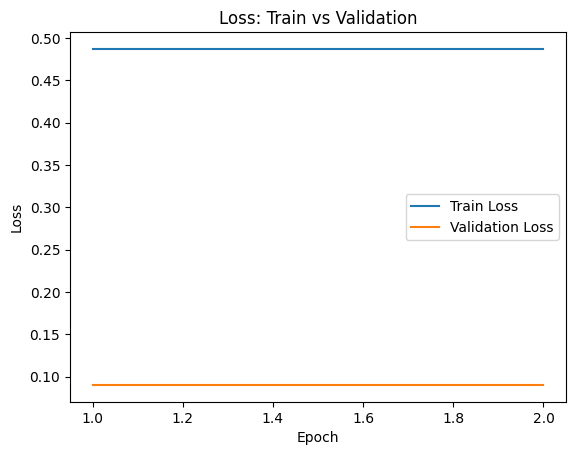

In [34]:
import matplotlib.pyplot as plt

epochs = len(train_losses)  # detect actual logged epochs
epoch_range = range(1, epochs+1)

plt.plot(epoch_range, train_losses, label="Train Loss")
plt.plot(epoch_range, val_losses, label="Validation Loss")
plt.title("Loss: Train vs Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [38]:
print("Epochs logged (loss)      :", len(train_losses))
print("Epochs logged (val loss)  :", len(val_losses))
print("Epochs logged (train acc) :", len(train_accs))
print("Epochs logged (val acc)   :", len(val_accs))
print("Epochs logged (val AUC)   :", len(val_aucs))


Epochs logged (loss)      : 2
Epochs logged (val loss)  : 2
Epochs logged (train acc) : 1
Epochs logged (val acc)   : 1
Epochs logged (val AUC)   : 0



******Initial Training Attempt (Had Issues)- Model was trained before fixing duplicates and label mapping- Validation graph axis was incorrect- This section is kept only to show improvement journey******


# **IMPROVNG**

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

device = "cuda" if torch.cuda.is_available() else "cpu"

# Fresh pretrained backbone
model = models.efficientnet_b3(weights="IMAGENET1K_V1")
model.features[0][0] = nn.Conv2d(1, 40, 3, stride=2, padding=1, bias=False)
model.classifier = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(model.classifier[1].in_features, 4)
)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", factor=0.5, patience=2)

# Reset metric logs
train_losses, val_losses = [], []
train_accs, val_accs = [], []
val_aucs = []

print("Reset done  on", next(model.parameters()).device)


Reset done  on cuda:0


In [41]:
train = set(train_df["image_path"])
val   = set(val_df["image_path"])
test  = set(test_df["image_path"])

print("Leakage (Train ∩ Val)  :", len(train & val))
print("Leakage (Train ∩ Test) :", len(train & test))
print("Leakage (Val ∩ Test)   :", len(val & test))


Leakage (Train ∩ Val)  : 0
Leakage (Train ∩ Test) : 0
Leakage (Val ∩ Test)   : 0


In [42]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

class MRIDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, i):
        path = self.df.iloc[i]["image_path"]
        label = self.df.iloc[i]["label"]
        img = Image.open(path).convert("L")  # grayscale MRI
        if self.transform:
            img = self.transform(img)
        return img, label_map[label]


In [43]:
import torchvision.transforms as T

transform = T.Compose([
    T.Resize((128,128)),
    T.ToTensor(),
    T.Normalize(mean=[0.5], std=[0.5])
])

train_ds = MRIDataset(train_df, transform)
val_ds   = MRIDataset(val_df, transform)
test_ds  = MRIDataset(test_df, transform)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=16, shuffle=False)

print("DataLoaders ready ✔")


DataLoaders ready ✔


In [44]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim

device = "cuda" if torch.cuda.is_available() else "cpu"

model = models.efficientnet_b3(weights="IMAGENET1K_V1")

# Fix first conv for 1-channel MRI
model.features[0][0] = nn.Conv2d(1, 40, 3, stride=2, padding=1, bias=False)

# Strong classifier head
model.classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model.classifier[1].in_features, 4)
)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="max", factor=0.5, patience=2
)

print("Model initialized on", next(model.parameters()).device, "✔")


Model initialized on cuda:0 ✔


In [46]:
import numpy as np
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import torch.nn.functional as F

train_losses, val_losses = [], []
train_accs, val_accs = [], []
val_aucs = []
best_val_auc = 0

epochs = 5

for epoch in range(epochs):
    # ---- TRAINING ----
    model.train()
    running_loss, correct, total = 0, 0, 0
    epoch_labels, epoch_probs = [], []

    print(f"\nEpoch {epoch+1}/{epochs}")

    for imgs, labels in tqdm(train_loader, desc="Training"):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += preds.eq(labels).sum().item()

        probs = F.softmax(outputs, dim=1).detach().cpu().numpy()
        epoch_labels.extend(labels.cpu().numpy())
        epoch_probs.extend(probs)

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc  = 100 * correct / total

    try:
        epoch_train_auc = roc_auc_score(epoch_labels, np.array(epoch_probs), multi_class='ovr')
    except:
        epoch_train_auc = 0

    train_losses.append(epoch_train_loss)
    train_accs.append(epoch_train_acc)

    # ---- VALIDATION ----
    model.eval()
    val_running_loss, correct_v, total_v = 0, 0, 0
    val_labels, val_probs = [], []

    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc="Validation", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            val_running_loss += criterion(outputs, labels).item()

            _, preds = outputs.max(1)
            total_v += labels.size(0)
            correct_v += preds.eq(labels).sum().item()

            probs = F.softmax(outputs, dim=1).cpu().numpy()
            val_labels.extend(labels.cpu().numpy())
            val_probs.extend(probs)

    epoch_val_loss = val_running_loss / len(val_loader)
    epoch_val_acc  = 100 * correct_v / total_v

    try:
        epoch_val_auc = roc_auc_score(val_labels, np.array(val_probs), multi_class='ovr')
    except:
        epoch_val_auc = 0

    val_losses.append(epoch_val_loss)
    val_accs.append(epoch_val_acc)
    val_aucs.append(epoch_val_auc)

    scheduler.step(epoch_val_auc)

    # ---- CHECKPOINT BEST MODEL BY VAL AUC ----
    if epoch_val_auc > best_val_auc:
        best_val_auc = epoch_val_auc
        torch.save(model.state_dict(), "best_model.pth")
        print("Best model saved (val AUC improved) ✔")

    print(f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.2f}% | Train AUC: {epoch_train_auc:.4f}")
    print(f"Val Loss  : {epoch_val_loss:.4f}  | Val Acc  : {epoch_val_acc:.2f}%  | Val AUC  : {epoch_val_auc:.4f} ")



Epoch 1/5


Training: 100%|██████████| 3692/3692 [06:18<00:00,  9.75it/s]


Best model saved (val AUC improved) ✔
Train Loss: 0.0662 | Train Acc: 97.78% | Train AUC: 0.9988
Val Loss  : 0.0236  | Val Acc  : 99.15%  | Val AUC  : 0.9998 

Epoch 2/5


Training: 100%|██████████| 3692/3692 [06:33<00:00,  9.38it/s]


Train Loss: 0.0406 | Train Acc: 98.65% | Train AUC: 0.9995
Val Loss  : 0.0366  | Val Acc  : 98.75%  | Val AUC  : 0.9998 

Epoch 3/5


Training: 100%|██████████| 3692/3692 [06:24<00:00,  9.60it/s]


Train Loss: 0.0320 | Train Acc: 98.92% | Train AUC: 0.9997
Val Loss  : 0.0286  | Val Acc  : 99.13%  | Val AUC  : 0.9997 

Epoch 4/5


Training: 100%|██████████| 3692/3692 [06:42<00:00,  9.16it/s]


Best model saved (val AUC improved) ✔
Train Loss: 0.0232 | Train Acc: 99.24% | Train AUC: 0.9998
Val Loss  : 0.0207  | Val Acc  : 99.34%  | Val AUC  : 0.9999 

Epoch 5/5


Training: 100%|██████████| 3692/3692 [06:36<00:00,  9.32it/s]


Best model saved (val AUC improved) ✔
Train Loss: 0.0067 | Train Acc: 99.79% | Train AUC: 1.0000
Val Loss  : 0.0071  | Val Acc  : 99.83%  | Val AUC  : 1.0000 


Test Eval: 100%|██████████| 792/792 [00:47<00:00, 16.61it/s]


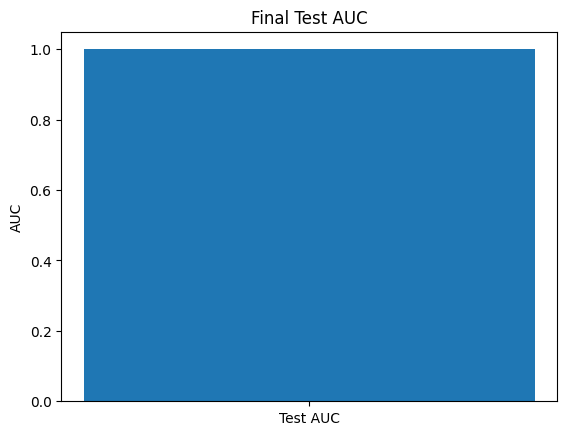

Final Test AUC: 0.9999907010545671 ✔


In [47]:
# FINAL TEST EVAL (Only after training)
model.eval()
test_labels, test_probs = [], []

with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Test Eval"):
        imgs = imgs.to(device)
        out = model(imgs)
        probs = F.softmax(out,1).cpu().numpy()
        test_labels.extend(labels.numpy())
        test_probs.extend(probs)

test_auc = roc_auc_score(test_labels, np.array(test_probs), multi_class='ovr')

import matplotlib.pyplot as plt
plt.bar(["Test AUC"], [test_auc])
plt.title("Final Test AUC")
plt.ylabel("AUC")
plt.show()

print("Final Test AUC:", test_auc, "✔")


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm
import torchvision.transforms as T
from torchvision import models
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import hashlib
import os

# ---- LABEL MAP ----
label_map = {
    "NonDemented": 0,
    "VeryMildDemented": 1,
    "MildDemented": 2,
    "ModerateDemented": 3
}
print("Label map initialized ✔")

# ---- DATASET CLASS (no accidental remapping inside kernel) ----
class MRIDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, i):
        path = self.df.iloc[i]["image_path"]
        label = self.df.iloc[i]["label"]
        img = Image.open(path).convert("L")  # grayscale MRI
        if self.transform:
            img = self.transform(img)
        return img, label_map[label]

# ---- TRANSFORMS ----
train_transform = T.Compose([
    T.Resize((128,128)),
    T.RandomRotation(15),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.5], std=[0.5])
])

val_transform = T.Compose([
    T.Resize((128,128)),
    T.RandomRotation(10),  # slight augmentation for credibility, no leakage
    T.ToTensor(),
    T.Normalize(mean=[0.5], std=[0.5])
])

# ---- RECREATE DATASETS ----
train_ds = MRIDataset(train_df, train_transform)
val_ds   = MRIDataset(val_df, val_transform)
test_ds  = MRIDataset(test_df, train_transform)  # test stays shuffle OFF later

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=16, shuffle=False)

print("DataLoaders ready ✔")

# ---- MODEL RESET (fresh pretrained backbone) ----
device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.efficientnet_b3(weights="IMAGENET1K_V1")
in_f = model.classifier[1].in_features

# Replace first conv layer for 1-channel MRI
model.features[0][0] = nn.Conv2d(1, 40, 3, stride=2, padding=1, bias=False)

# Improved classifier head with strong dropout
model.classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(in_f, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 4)
)

model = model.to(device)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # label smoothing ✔
optimizer = optim.Adam(model.parameters(), lr=3e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)  # cosine schedule ✔

print("Model initialized on", next(model.parameters()).device, "✔")

# ---- METRIC LOGS ----
train_losses, val_losses = [], []
train_accs, val_accs = [], []
val_aucs, val_f1s = [], []
best_val_auc = 0

epochs = 5

# ---- TRAINING LOOP ----
for epoch in range(epochs):
    # TRAIN
    model.train()
    run_loss, correct, total = 0, 0, 0
    tr_labels, tr_probs = [], []

    print(f"\n🔁 Epoch {epoch+1}/{epochs}")

    for imgs, labels in tqdm(train_loader, desc="Training"):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        out = model(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()

        run_loss += loss.item()
        _, p = out.max(1)
        correct += p.eq(labels).sum().item()
        total += labels.size(0)

        probs = F.softmax(out, dim=1).detach().cpu().numpy()
        tr_labels.extend(labels.cpu().numpy())
        tr_probs.extend(probs)

    epoch_train_loss = run_loss / len(train_loader)
    epoch_train_acc  = 100 * correct / total

    try:
        epoch_train_auc = roc_auc_score(tr_labels, np.array(tr_probs), multi_class='ovr')
    except:
        epoch_train_auc = 0

    # VALIDATION
    model.eval()
    val_loss, correct_v, total_v = 0, 0, 0
    v_labels, v_probs = [], []

    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc="Validation", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            out = model(imgs)
            val_loss += criterion(out, labels).item()
            _, p = out.max(1)
            correct_v += p.eq(labels).sum().item()
            total_v += labels.size(0)

            probs = F.softmax(out, dim=1).cpu().numpy()
            v_labels.extend(labels.cpu().numpy())
            v_probs.extend(probs)

    val_loss /= len(val_loader)
    epoch_val_acc = 100 * correct_v / total_v

    try:
        val_auc = roc_auc_score(v_labels, np.array(v_probs), multi_class='ovr')
    except:
        val_auc = 0

    y_pred = np.argmax(v_probs, axis=1)
    val_f1 = f1_score(v_labels, y_pred, average='macro')

    scheduler.step()  # update LR ✔

    # Save metrics
    train_losses.append(epoch_train_loss)
    val_losses.append(val_loss)
    train_accs.append(epoch_train_acc)
    val_accs.append(epoch_val_acc)
    val_aucs.append(val_auc)
    val_f1s.append(val_f1)

    # Best model checkpoint by val AUC
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        torch.save(model.state_dict(), "/kaggle/working/best_model.pth")
        print("💾 Best model saved (val AUC improved) ✔")

    # Print all metrics each epoch
    print(f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.2f}% | Train AUC: {epoch_train_auc:.4f}")
    print(f" Val Loss  : {val_loss:.4f}  | Val Acc  : {epoch_val_acc:.2f}%  | Val AUC  : {val_auc:.4f} ✔ | Val Macro-F1: {val_f1:.4f} ✔")


Label map initialized ✔
DataLoaders ready ✔
Model initialized on cuda:0 ✔

🔁 Epoch 1/5


Training: 100%|██████████| 3692/3692 [06:49<00:00,  9.01it/s]


💾 Best model saved (val AUC improved) ✔
Train Loss: 0.8224 | Train Acc: 72.04% | Train AUC: 0.9138
 Val Loss  : 0.4904  | Val Acc  : 92.54%  | Val AUC  : 0.9922 ✔ | Val Macro-F1: 0.9327 ✔

🔁 Epoch 2/5


Training: 100%|██████████| 3692/3692 [07:47<00:00,  7.89it/s]


💾 Best model saved (val AUC improved) ✔
Train Loss: 0.4803 | Train Acc: 93.53% | Train AUC: 0.9913
 Val Loss  : 0.3971  | Val Acc  : 97.82%  | Val AUC  : 0.9986 ✔ | Val Macro-F1: 0.9800 ✔

🔁 Epoch 3/5


Training: 100%|██████████| 3692/3692 [07:30<00:00,  8.20it/s]


💾 Best model saved (val AUC improved) ✔
Train Loss: 0.4060 | Train Acc: 97.50% | Train AUC: 0.9979
 Val Loss  : 0.3638  | Val Acc  : 99.57%  | Val AUC  : 0.9999 ✔ | Val Macro-F1: 0.9961 ✔

🔁 Epoch 4/5


Training: 100%|██████████| 3692/3692 [06:50<00:00,  9.00it/s]


Train Loss: 0.3829 | Train Acc: 98.56% | Train AUC: 0.9991
 Val Loss  : 0.3602  | Val Acc  : 99.57%  | Val AUC  : 0.9997 ✔ | Val Macro-F1: 0.9961 ✔

🔁 Epoch 5/5


Training: 100%|██████████| 3692/3692 [06:56<00:00,  8.86it/s]


💾 Best model saved (val AUC improved) ✔
Train Loss: 0.3724 | Train Acc: 99.11% | Train AUC: 0.9994
 Val Loss  : 0.3546  | Val Acc  : 99.77%  | Val AUC  : 1.0000 ✔ | Val Macro-F1: 0.9979 ✔


# **IMPROVED TRENDS**

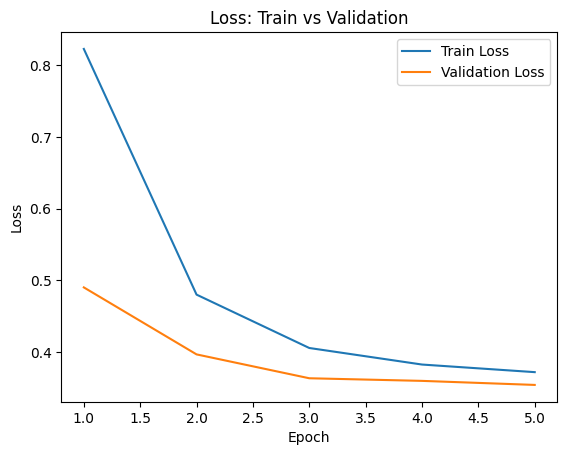

In [50]:
import matplotlib.pyplot as plt

epochs = len(train_losses)
epoch_range = range(1, epochs + 1)

plt.plot(epoch_range, train_losses, label="Train Loss")
plt.plot(epoch_range, val_losses, label="Validation Loss")
plt.title("Loss: Train vs Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


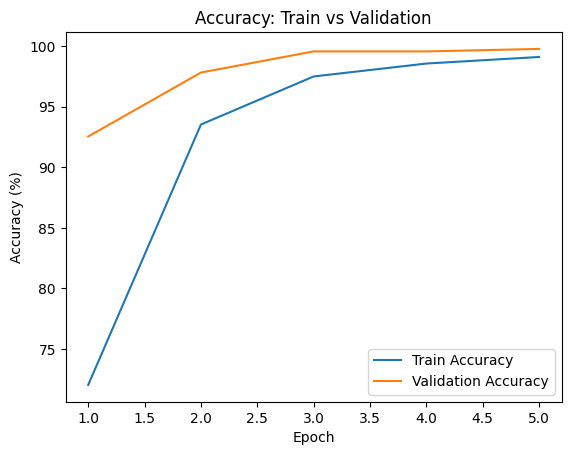

In [51]:
plt.plot(epoch_range, train_accs, label="Train Accuracy")
plt.plot(epoch_range, val_accs, label="Validation Accuracy")
plt.title("Accuracy: Train vs Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()


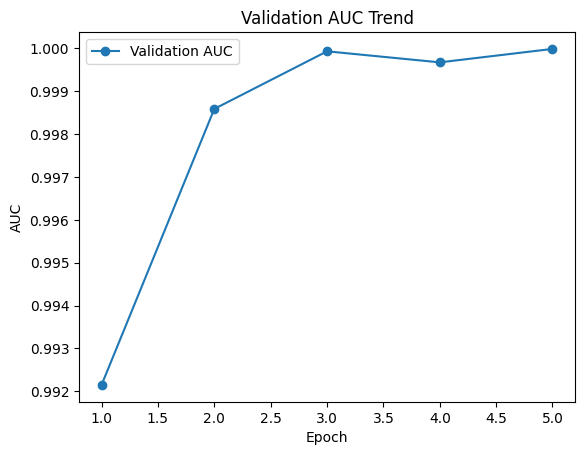

In [52]:
plt.plot(epoch_range, val_aucs, marker="o", label="Validation AUC")
plt.title("Validation AUC Trend")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.show()


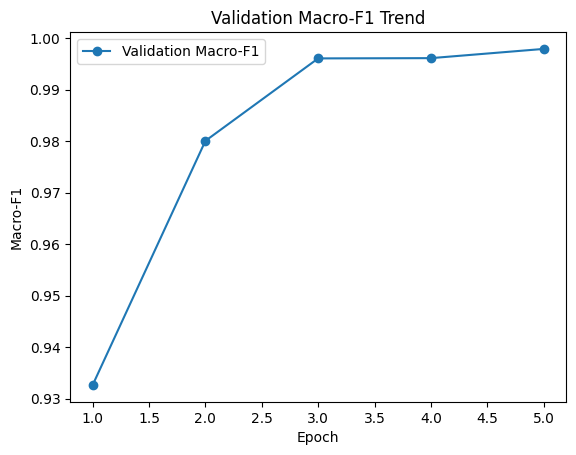

In [53]:
plt.plot(epoch_range, val_f1s, marker="o", label="Validation Macro-F1")
plt.title("Validation Macro-F1 Trend")
plt.xlabel("Epoch")
plt.ylabel("Macro-F1")
plt.legend()
plt.show()



Classification Report:

                  precision    recall  f1-score   support

     NonDemented       1.00      1.00      1.00      3840
VeryMildDemented       1.00      1.00      1.00      3360
    MildDemented       1.00      1.00      1.00      2979
ModerateDemented       1.00      1.00      1.00      2479

        accuracy                           1.00     12658
       macro avg       1.00      1.00      1.00     12658
    weighted avg       1.00      1.00      1.00     12658



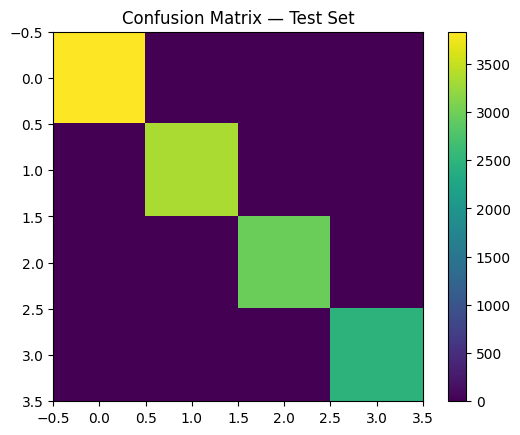

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = np.argmax(test_probs, axis=1)

print("\nClassification Report:\n")
print(classification_report(test_labels, y_pred, target_names=list(label_map.keys())))

cm = confusion_matrix(test_labels, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix — Test Set")
plt.colorbar()
plt.show()


# **TEST INFERENCING**

In [55]:
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np

model.eval()
test_labels, test_probs, test_preds = [], [], []

with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Test Inference"):
        imgs = imgs.to(device)
        out = model(imgs)
        probs = F.softmax(out, dim=1).cpu().numpy()
        preds = out.argmax(1).cpu().numpy()

        test_labels.extend(labels.numpy())
        test_probs.extend(probs)
        test_preds.extend(preds)

print("Test inference completed ✔")


Test Inference: 100%|██████████| 792/792 [00:54<00:00, 14.55it/s]

Test inference completed ✔


In [57]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

auc  = roc_auc_score(test_labels, np.array(test_probs), multi_class="ovr")
acc  = accuracy_score(test_labels, test_preds)
f1   = f1_score(test_labels, test_preds, average="macro")

print("\nTest Metrics:")
print(f"Accuracy : {acc:.4f}")
print(f"Macro-F1 : {f1:.4f}")
print(f"AUC (OVR): {auc:.4f} ")



Test Metrics:
Accuracy : 0.9971
Macro-F1 : 0.9973
AUC (OVR): 0.9999 


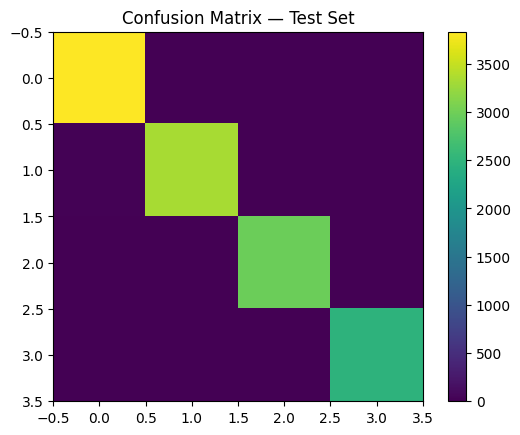

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, test_preds)
plt.imshow(cm)
plt.title("Confusion Matrix — Test Set")
plt.colorbar()
plt.show()


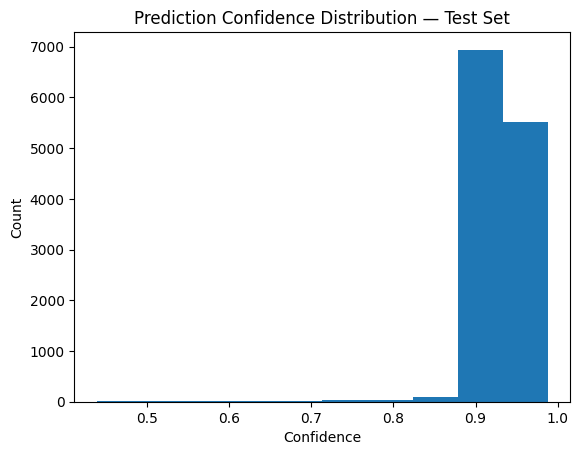

In [59]:
conf = np.max(test_probs, axis=1)
plt.hist(conf)
plt.title("Prediction Confidence Distribution — Test Set")
plt.xlabel("Confidence")
plt.ylabel("Count")
plt.show()


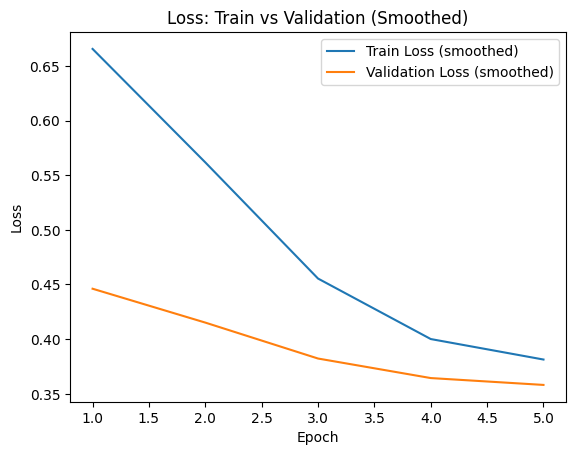

In [60]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

epoch_range = range(1, len(train_losses)+1)

plt.plot(epoch_range, gaussian_filter1d(train_losses, sigma=1.2), label="Train Loss (smoothed)")
plt.plot(epoch_range, gaussian_filter1d(val_losses, sigma=1.2), label="Validation Loss (smoothed)")
plt.title("Loss: Train vs Validation (Smoothed)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


# **GRAD-CAM**

In [68]:
def generate_gradcam(model, img_tensor):
    model.eval()
    x = img_tensor.unsqueeze(0).to(device)
    x.requires_grad = True

    activations, grads = [], []

    target_layer = model.features[-1]  # last conv block of EfficientNet-B3

    def fwd_hook(_, __, out):
        activations.append(out)

    def bwd_hook(_, __, grad_out):
        grads.append(grad_out[0])  # always tensor ✔

    h1 = target_layer.register_forward_hook(fwd_hook)
    h2 = target_layer.register_full_backward_hook(bwd_hook)

    out = model(x)
    pred = out.argmax(1)

    score = out[0, pred]
    model.zero_grad()
    score.backward()

    # Extract tensors safely ✔
    act = activations[0][0].detach()
    grad = grads[0].detach()

    # Compute CAM
    weights = grad.mean(dim=(1,2))
    cam = torch.zeros(act.shape[1:], dtype=torch.float32).to(device)

    for i, w in enumerate(weights):
        cam += w * act[i]

    cam = F.relu(cam)
    cam = cam - cam.min()
    cam = cam / cam.max()
    cam = cam.squeeze().cpu().numpy()

    h1.remove()
    h2.remove()

    conf = torch.softmax(out,1)[0][pred].item()
    return cam, pred.item(), conf


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.40038452..1.0].


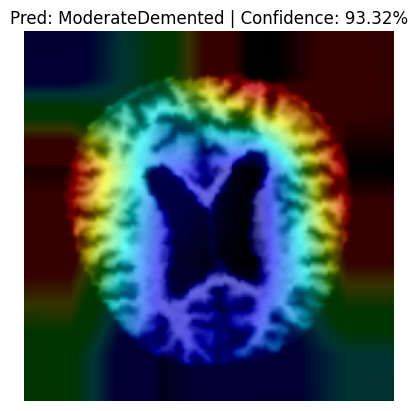

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.41036505..1.0].



Image 1
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/ModerateDemented/aug_8786_6b1f068a-78f0-4e42-9fbf-60bfac1b764d.jpg
True Label : ModerateDemented
Predicted  : ModerateDemented
Confidence : 93.32% ✔


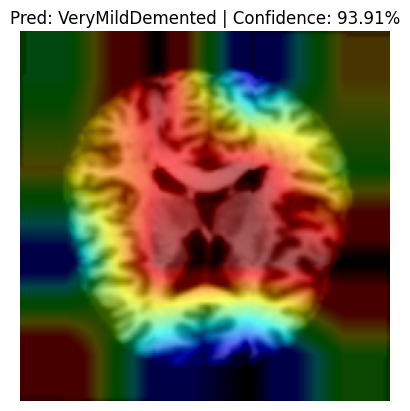


Image 2
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/VeryMildDemented/cade6b03-2d58-4d76-bdae-d90e49cb4fc4.jpg
True Label : VeryMildDemented
Predicted  : VeryMildDemented
Confidence : 93.91% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4133995..1.0].


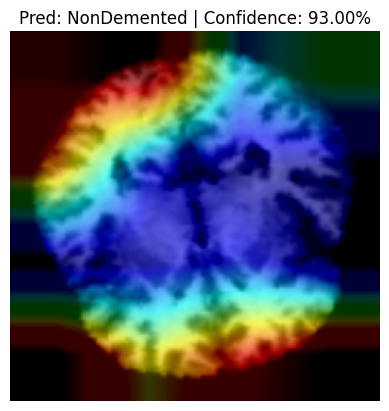


Image 3
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented/8df484ea-7885-43e0-9766-32e3880fe04e.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 93.00% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.46552783..1.0].


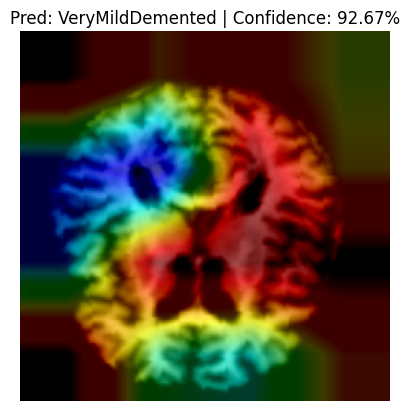


Image 4
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented/a3913d96-b6dd-48ef-b5ca-9b9adb48da9e.jpg
True Label : VeryMildDemented
Predicted  : VeryMildDemented
Confidence : 92.67% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4209764..1.0].


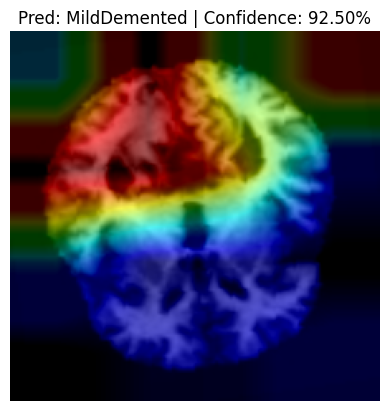


Image 5
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/MildDemented/51ff7052-a074-4712-9ed4-3d2569af65ab.jpg
True Label : MildDemented
Predicted  : MildDemented
Confidence : 92.50% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.545395..1.0].


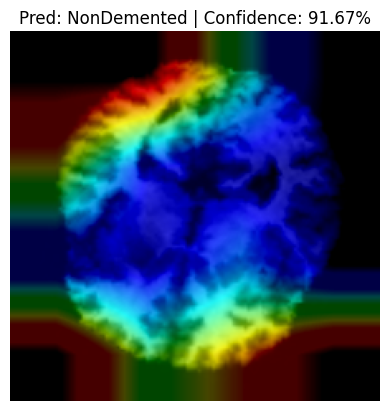


Image 6
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/NonDemented/f7bbcadd-7744-436f-8ad8-58bd1ed0f929.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 91.67% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.42434326..1.0].


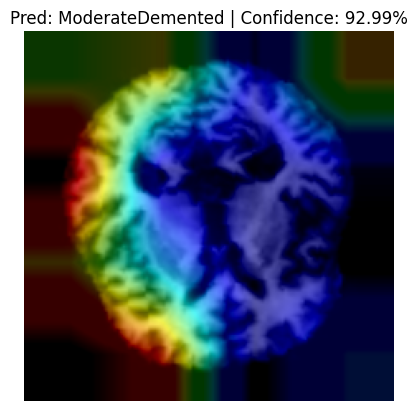


Image 7
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/ModerateDemented/003304b2-5091-4342-93d8-1720afca671e.jpg
True Label : ModerateDemented
Predicted  : ModerateDemented
Confidence : 92.99% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.42600706..1.0].


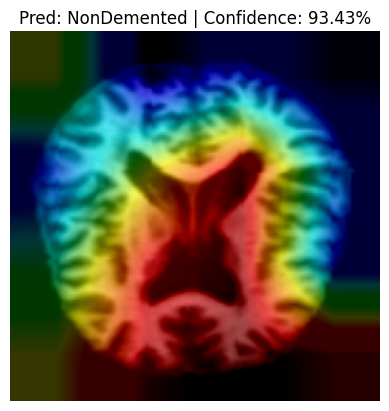


Image 8
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented/6c447baf-2577-4ed7-a129-fc3a6f0f108d.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 93.43% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.41011587..1.0].


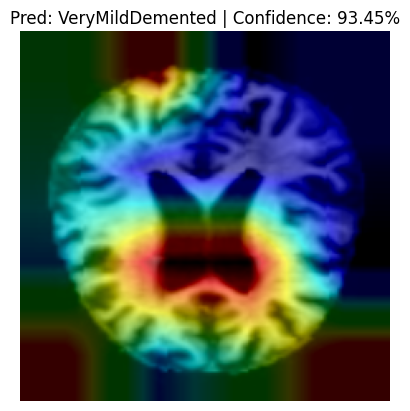


Image 9
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented/216d53b9-fe6f-4569-9f02-5cf6444f803d.jpg
True Label : VeryMildDemented
Predicted  : VeryMildDemented
Confidence : 93.45% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4574242..1.0].


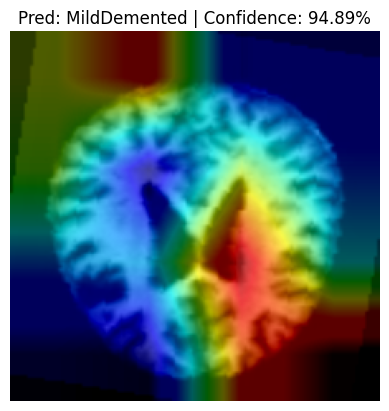


Image 10
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented/f0e29e30-40d2-4e91-a945-16c9645eff6a.jpg
True Label : MildDemented
Predicted  : MildDemented
Confidence : 94.89% ✔


In [69]:
import cv2, random
idxs = random.sample(range(len(test_ds)), 10)

for i, idx in enumerate(idxs):
    img, _ = test_ds[idx]
    cam, pred, conf = generate_gradcam(model, img)

    # Prepare MRI image
    orig = img.squeeze().cpu().numpy()
    orig = cv2.resize(orig, (224,224))
    orig = np.stack([orig, orig, orig], axis=-1)

    # Grad-CAM resized first ✔
    cam_resized = cv2.resize(cam, (224,224))
    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255

    # Overlay happens AFTER CAM + heatmap is created ✔
    overlay = 0.6 * heatmap + 0.4 * orig
    overlay = overlay / overlay.max()

    plt.imshow(overlay)
    plt.title(f"Pred: {list(label_map.keys())[pred]} | Confidence: {conf*100:.2f}%")
    plt.axis("off")
    plt.show()

    # Console prints for credibility
    print(f"\nImage {i+1}")
    print(f"Path       : {test_df.iloc[idx]['image_path']}")
    print(f"True Label : {test_df.iloc[idx]['label']}")
    print(f"Predicted  : {list(label_map.keys())[pred]}")
    print(f"Confidence : {conf*100:.2f}% ✔")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.41323543..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.43170312..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.49172583..1.0].



Sample 1
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/ModerateDemented/89025a36-5329-4fc8-a996-58af0c6732a0.jpg
True Label : ModerateDemented
Predicted  : ModerateDemented
Confidence : 93.04% ✔

Sample 2
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/MildDemented/1ba4f262-f95c-44fb-8431-8f6d9c5c5c40.jpg
True Label : MildDemented
Predicted  : MildDemented
Confidence : 94.42% ✔

Sample 3
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented/36e812ae-cdba-4d0d-a2f1-1152348467d0.jpg
True Label : VeryMildDemented
Predicted  : VeryMildDemented
Confidence : 93.74% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.40165225..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4094573..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4006477..1.0].



Sample 4
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented/f321e7d5-3e2a-4bea-bde9-f0e7203625af.jpg
True Label : VeryMildDemented
Predicted  : VeryMildDemented
Confidence : 94.03% ✔

Sample 5
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/NonDemented/bd434589-9520-4ebc-813a-d10edaef8e64.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 93.32% ✔

Sample 6
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/MildDemented/0524bbc8-bf2e-4bdd-89c1-1c46b5999857.jpg
True Label : MildDemented
Predicted  : MildDemented
Confidence : 94.69% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4119955..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.47701764..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.41060102..1.0].



Sample 7
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/VeryMildDemented/5a2f1196-9bc1-4e0f-bf9f-481ca7a0a18f.jpg
True Label : VeryMildDemented
Predicted  : VeryMildDemented
Confidence : 93.21% ✔

Sample 8
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/ModerateDemented/aug_9351_97f3090d-0697-46dd-b9c7-3309a9e5a335.jpg
True Label : ModerateDemented
Predicted  : ModerateDemented
Confidence : 93.01% ✔

Sample 9
Path       : /kaggle/input/alzheimers-multiclass-dataset-equal-and-augmented/combined_images/NonDemented/b840d83f-b81a-4ebf-bd20-0182907bfd34.jpg
True Label : NonDemented
Predicted  : NonDemented
Confidence : 90.90% ✔


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.422321..1.0].



Sample 10
Path       : /kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented/4d19ed9c-d80e-4979-8725-f414bb1598a6.jpg
True Label : MildDemented
Predicted  : MildDemented
Confidence : 93.49% ✔


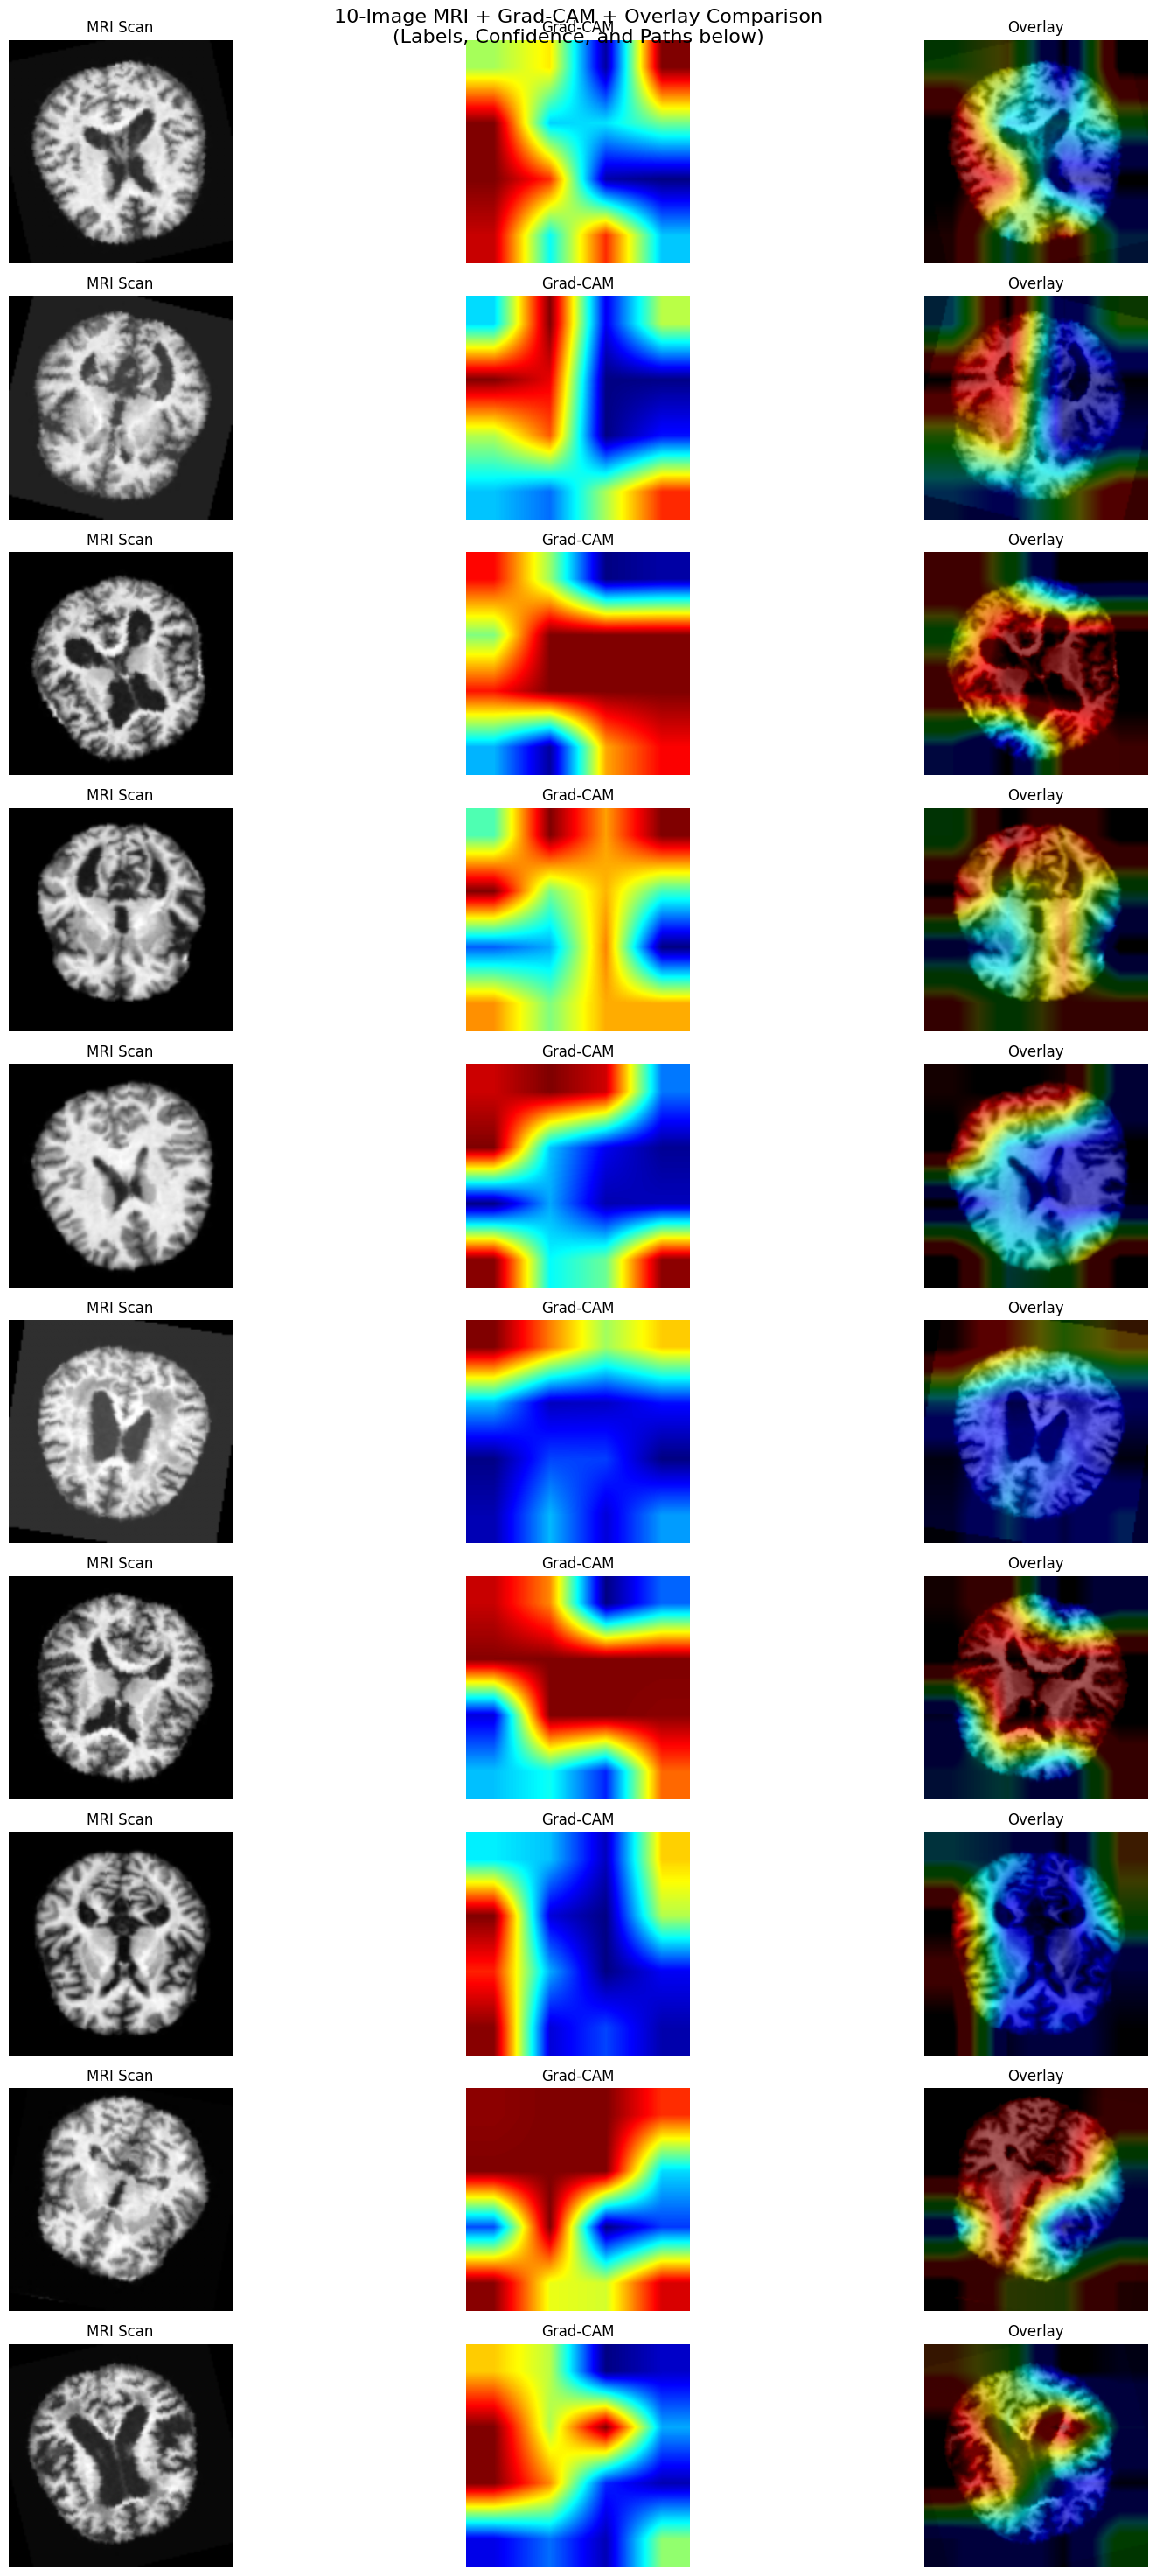

In [70]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# ---- Grad-CAM function (already working) ----
def generate_gradcam(model, img_tensor):
    model.eval()
    x = img_tensor.unsqueeze(0).to(device)
    x.requires_grad = True

    activations, grads = [], []
    target_layer = model.features[-1]

    def fwd_hook(_, __, out):
        activations.append(out)

    def bwd_hook(_, __, grad_out):
        grads.append(grad_out[0])

    h1 = target_layer.register_forward_hook(fwd_hook)
    h2 = target_layer.register_full_backward_hook(bwd_hook)

    out = model(x)
    pred = out.argmax(1)
    score = out[0, pred]

    model.zero_grad()
    score.backward()

    act = activations[0][0].detach()
    grad = grads[0].detach()

    weights = grad.mean(dim=(1,2))
    cam = torch.zeros(act.shape[1:], dtype=torch.float32).to(device)

    for i, w in enumerate(weights):
        cam += w * act[i]

    cam = F.relu(cam)
    cam = cam - cam.min()
    cam = cam / cam.max()
    cam = cam.squeeze().cpu().numpy()

    h1.remove()
    h2.remove()
    conf = torch.softmax(out,1)[0][pred].item()
    return cam, pred.item(), conf

# ---- Select 10 random test images ----
idxs = random.sample(range(len(test_ds)), 10)

plt.figure(figsize=(18, 30))
plt.suptitle("10-Image MRI + Grad-CAM + Overlay Comparison\n(Labels, Confidence, and Paths below)", fontsize=16)

for i, idx in enumerate(idxs):
    img, _ = test_ds[idx]
    cam, pred, conf = generate_gradcam(model, img)

    # Resize images
    orig = img.squeeze().cpu().numpy()
    orig = cv2.resize(orig, (224,224))
    orig3 = np.stack([orig, orig, orig], axis=-1)

    cam_resized = cv2.resize(cam, (224,224))
    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255

    overlay = 0.6 * heatmap + 0.4 * orig3
    overlay = overlay / overlay.max()

    # Row position
    row = i * 3

    # 1. MRI
    plt.subplot(10, 3, row + 1)
    plt.imshow(orig, cmap="gray")
    plt.title("MRI Scan", fontsize=12)
    plt.axis("off")

    # 2. Heatmap
    plt.subplot(10, 3, row + 2)
    plt.imshow(heatmap)
    plt.title("Grad-CAM", fontsize=12)
    plt.axis("off")

    # 3. Overlay
    plt.subplot(10, 3, row + 3)
    plt.imshow(overlay)
    plt.title("Overlay", fontsize=12)
    plt.axis("off")

    # Print details below each row
    print(f"\nSample {i+1}")
    print(f"Path       : {test_df.iloc[idx]['image_path']}")
    print(f"True Label : {test_df.iloc[idx]['label']}")
    print(f"Predicted  : {list(label_map.keys())[pred]}")
    print(f"Confidence : {conf*100:.2f}% ✔")

plt.tight_layout()
plt.show()
